## DENOISING METODE FFT DAN WAVELET

Akhmad Sultoni, 23/528781/PPA/06688

Kontruksi Fungsi

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import IPython

plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.size'] = 8

# Membuat Signal 1D
dt = 0.001
t = np.arange(0,1,dt)
f = (
    np.sin(2*np.pi*50*t) +
    np.sin(2*np.pi*120*t) +
    0.5*np.sin(2*np.pi*200*t) +
    0.8*np.sin(2*np.pi*80*t) +
    0.3*np.sin(2*np.pi*300*t)
)

Plot Fungsi yg dikontruksi

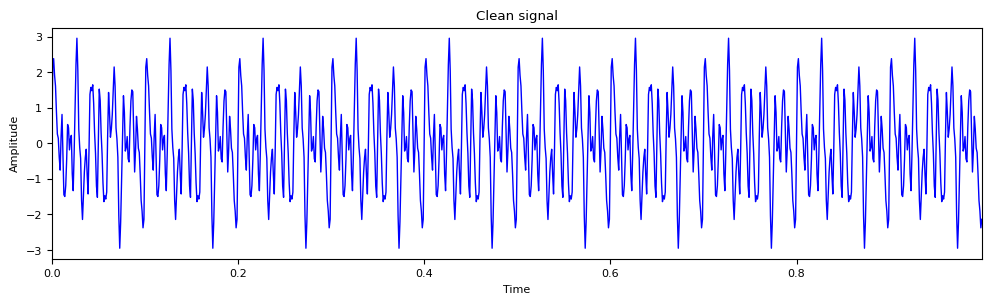

In [66]:
# Plot Clean Signal 1D
plt.plot(t, f, linewidth=1.0, color='b')
plt.title('Clean signal');
plt.xlim(t[0], t[-1]);
plt.xlabel('Time');
plt.ylabel('Amplitude');
plt.savefig('clean_signal.png')
plt.show()

Kontruksi Fungsi ditambah Noise

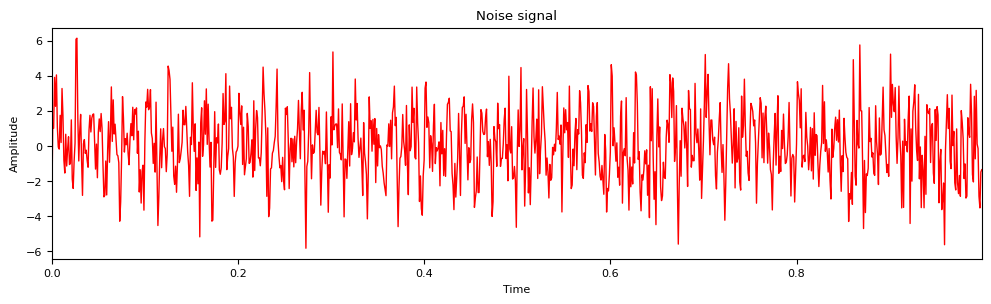

In [81]:
# Membuat sinyal dengan noise
f_t = f+1.5*np.random.randn(len(t))

# Plot Sinyal dengan noise
plt.plot(t, f_t, linewidth=1.0, color='r')
plt.title('Noise signal');
plt.xlim(t[0], t[-1]);
plt.xlabel('Time');
plt.ylabel('Amplitude');
plt.savefig('Noise_signal.png')
plt.show()

Plot Fungsi Asli dan Fungsi Noise

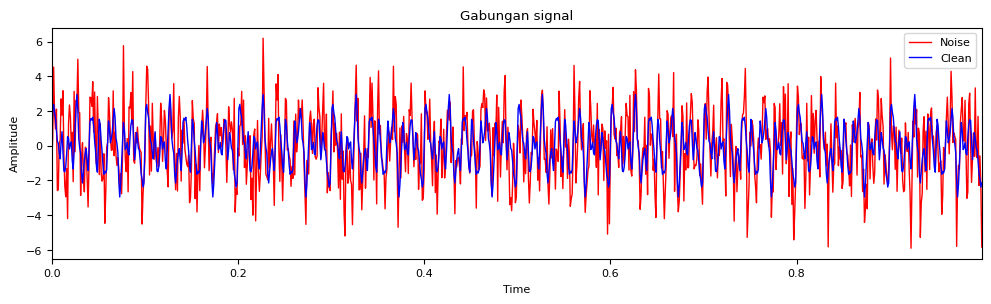

In [69]:
# Plot Sinyal Awal dengan Sinyal Nois
plt.plot(t, f_t, linewidth=1.0, color='r')
plt.plot(t,f, linewidth=1.0,color='b')
plt.title('Gabungan signal');
plt.xlim(t[0], t[-1]);
plt.xlabel('Time');
plt.ylabel('Amplitude');
plt.legend(['Noise','Clean'])
plt.savefig('Gabungan_signal.png')
plt.show()

Denoising dengan FFT

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


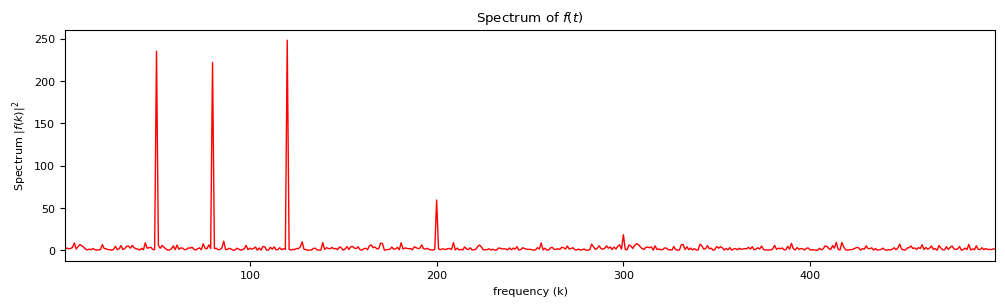

In [82]:
# Menghitung Fast Fourier Transform (FFT)
n = len(t)
fhat = np.fft.fft(f_t,n)
PSD = fhat*np.conj(fhat)/n
freq = (1/(dt*n))* np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int')

plt.plot(freq[L], PSD[L], linewidth=1.0, color='r');
plt.xlim(freq[L[0]], freq[L[-1]])
plt.title('Spectrum of $f(t)$')
plt.xlabel('frequency (k)')
plt.ylabel('Spectrum $|f(k)|^2$')
plt.savefig('Spectrum_of_f(t).png')
plt.show()

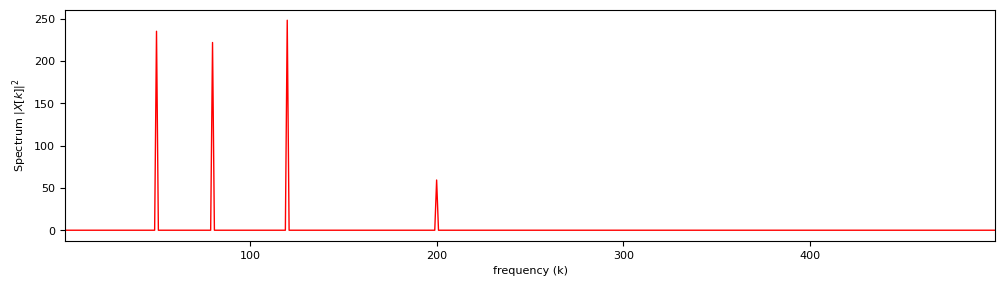

In [83]:
THRESHOLD = 50

# Dapatkan nilai-nilai (k) yang lebih tinggi daripada THRESHOLD.
indices = PSD > THRESHOLD

# Buat yang lain nol
PSD_clean = PSD * indices

# Filter
fhat = fhat * indices

# inverse FFT
filtered_signal = np.fft.ifft(fhat)

plt.plot(freq[L], PSD_clean[L], linewidth=1.0, color='r');
plt.xlim(freq[L[0]], freq[L[-1]])
plt.xlabel('frequency (k)')
plt.ylabel('Spectrum $|X[k]|^2$')
plt.savefig('Spectrum_of_f(t)_clean.png')
plt.show()

Plot Hasil Denoising dengan Fungsi Awal

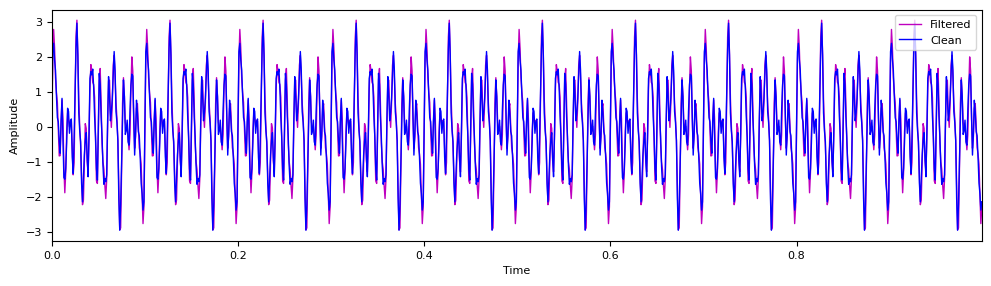

In [74]:
plt.plot(t, filtered_signal, linewidth=1.0, color='m');
plt.plot(t,f,linewidth=1.0, color='b')
plt.xlim(t[0], t[-1])
plt.xlabel('Time');
plt.ylabel('Amplitude');
plt.legend(['Filtered','Clean'])
plt.savefig('Filtered_signal.png')
plt.show()

Denoising Metode Wavelet

In [75]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pywt

<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-2829828171.py:6: SyntaxWarning: invalid escape sequence '\p'
  plt.title("$\phi$")
/tmp/ipython-input-2829828171.py:9: SyntaxWarning: invalid escape sequence '\p'
  plt.title("$\psi$")


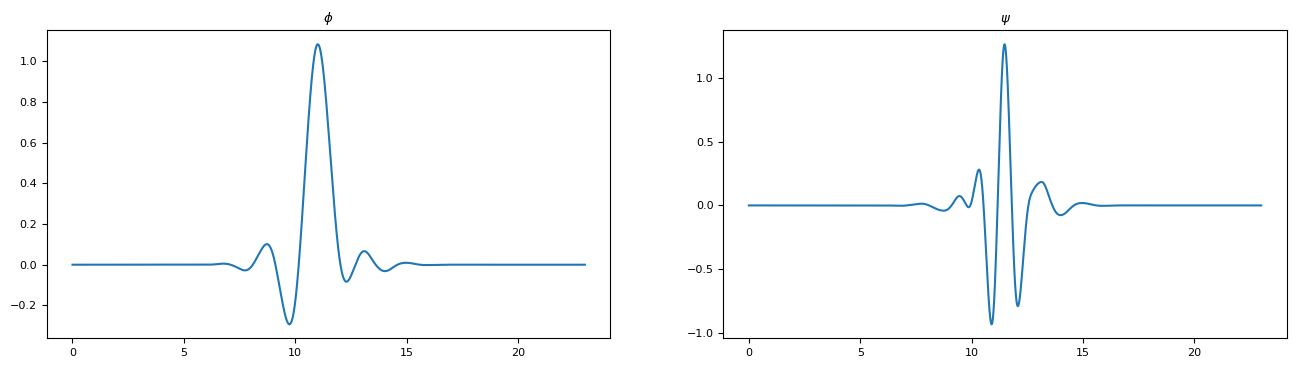

In [84]:
# Wavelet yang digunakan yaitu sym12
sym12 = pywt.Wavelet("sym12")
phi_s12, psi_s12, x_s12 = sym12.wavefun(8)
plt.figure(figsize=(16,4))
plt.subplot(121)
plt.title("$\phi$")
plt.plot(x_s12,phi_s12)
plt.subplot(122)
plt.title("$\psi$")
plt.plot(x_s12,psi_s12)
plt.show()

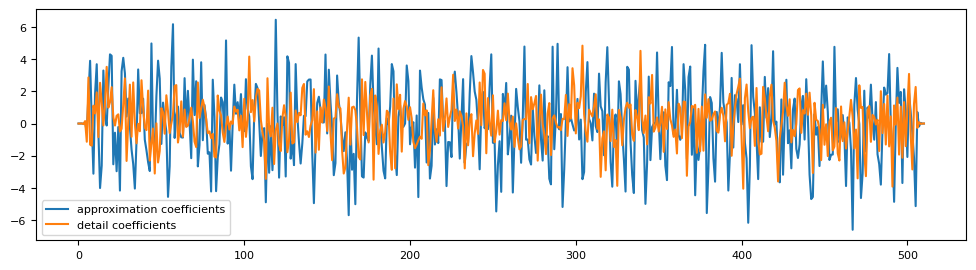

In [77]:
# Proses Dekomposisi Level 1
sig_dop_n2=f_t
cA, cD = pywt.dwt(sig_dop_n2, "sym12", mode="zero")
plt.plot(cA, label="approximation coefficients")
plt.plot(cD, label="detail coefficients")
plt.legend(loc="best")
plt.savefig('dwt_sym12.png')
plt.show()

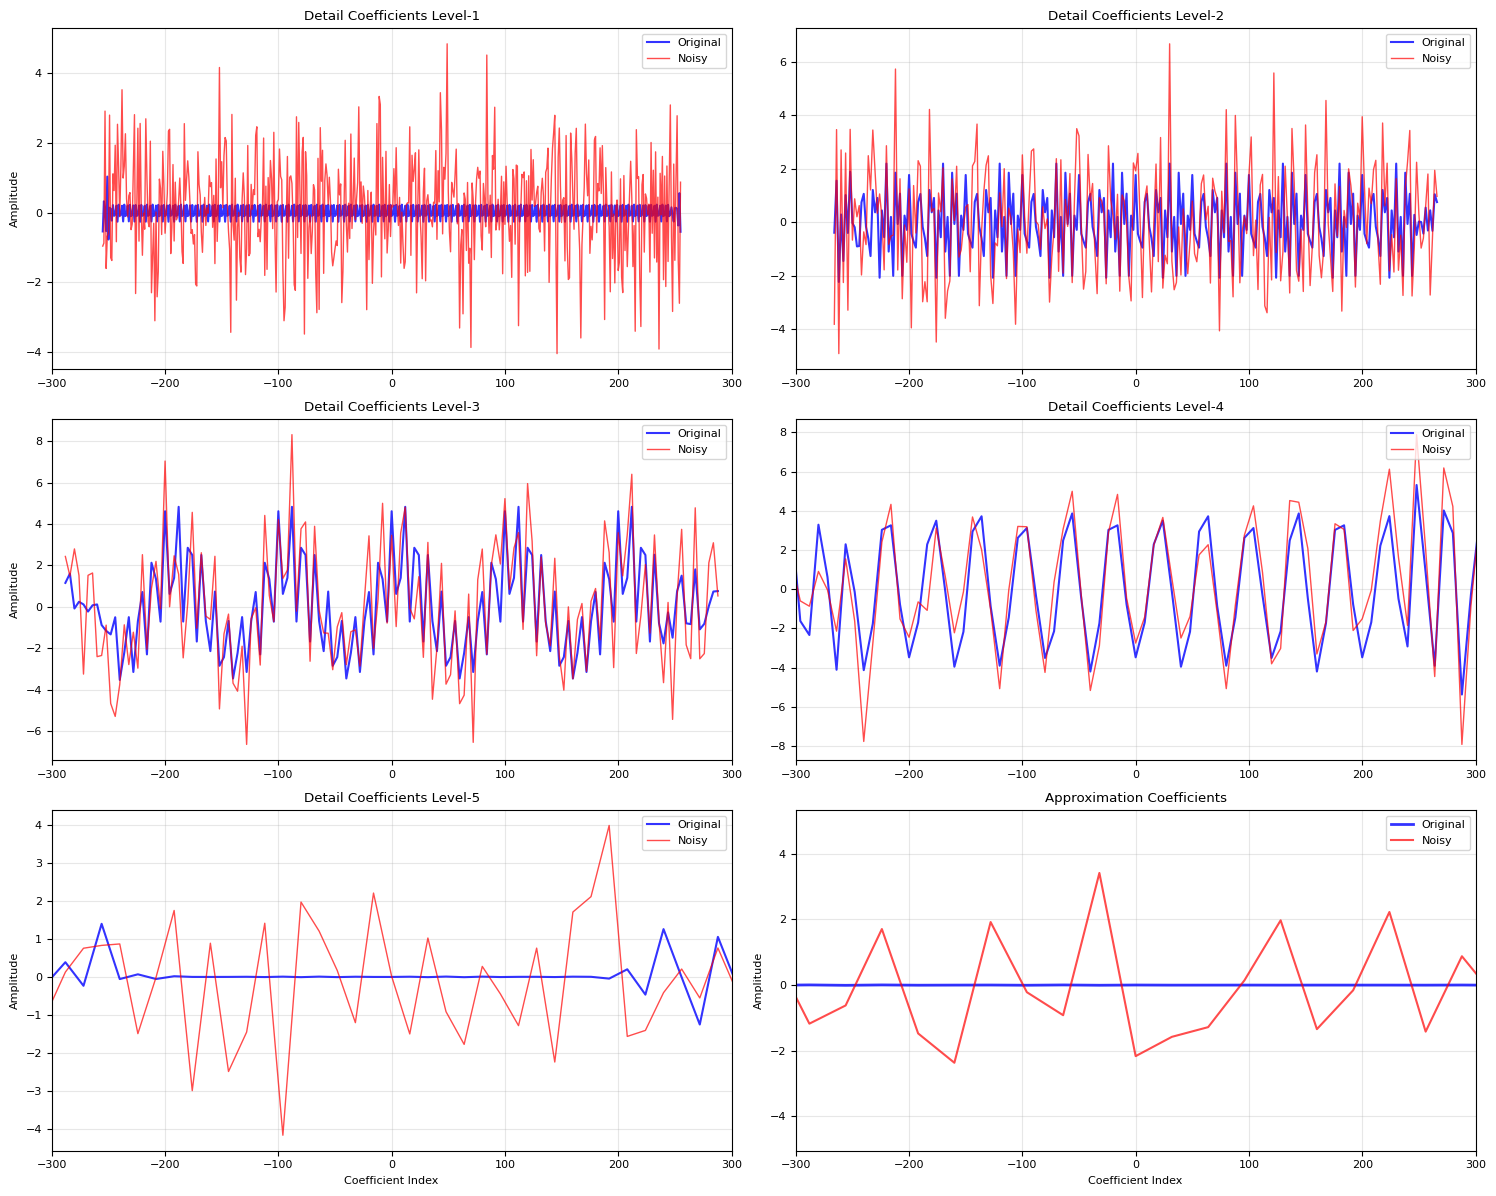

In [85]:
# Dekomposisi Beberapa Level
def plot_dwt_compact(details_orig, approx_orig, details_noisy, approx_noisy, xlim=(-300,300)):
    """
    Function to plot DWT coefficients in compact 3x2 grid layout
    Each subplot shows both original and noisy signals for comparison
    """
    n_levels = len(details_orig)

    # Create figure with 3 rows and 2 columns
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    # fig.suptitle('Wavelet Coefficients Comparison: Original vs Noisy Signals',
    #              fontsize=16, y=0.98)

    # Flatten the axes array for easier indexing
    axes_flat = axes.flatten()

    # Plot detail coefficients for each level
    for i in range(n_levels):
        # Get detail coefficients for current level (reverse order: high to low frequency)
        d_orig = details_orig[n_levels-1-i]
        d_noisy = details_noisy[n_levels-1-i]

        # Calculate x values with proper scaling
        half = len(d_orig) // 2
        xvals = np.arange(-half, -half + len(d_orig)) * (2**i)

        # Plot both original and noisy on the same subplot
        axes_flat[i].plot(xvals, d_orig, color='blue', linewidth=1.5, alpha=0.8, label='Original')
        axes_flat[i].plot(xvals, d_noisy, color='red', linewidth=1.0, alpha=0.7, label='Noisy')
        axes_flat[i].set_xlim(xlim)
        axes_flat[i].grid(True, alpha=0.3)
        axes_flat[i].set_title(f'Detail Coefficients Level-{i+1}')
        axes_flat[i].legend(loc='upper right', fontsize=8)

        # Add ylabel only to left column
        if i % 2 == 0:
            axes_flat[i].set_ylabel('Amplitude')

    # Plot approximation coefficients in the last subplot (position 5)
    half_approx = len(approx_orig) // 2
    xvals_approx = np.arange(-half_approx, -half_approx + len(approx_orig)) * (2**n_levels)

    axes_flat[5].plot(xvals_approx, approx_orig, color='blue', linewidth=2, alpha=0.8, label='Original')
    axes_flat[5].plot(xvals_approx, approx_noisy, color='red', linewidth=1.5, alpha=0.7, label='Noisy')
    axes_flat[5].set_xlim(xlim)
    axes_flat[5].grid(True, alpha=0.3)
    axes_flat[5].set_title('Approximation Coefficients')
    axes_flat[5].set_xlabel('Coefficient Index')
    axes_flat[5].set_ylabel('Amplitude')
    axes_flat[5].legend(loc='upper right', fontsize=8)

    # Set xlabels for bottom row
    for i in range(4, 6):
        axes_flat[i].set_xlabel('Coefficient Index')

    plt.tight_layout()
    return fig, axes

# Create the compact comparison plot
fig, axes = plot_dwt_compact(details, approx, details_n, approx_n, xlim=(-300,300))

plt.savefig('dwt_sym12_compact_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

Proses Denoising Wavelet dan Dekomposisi Fungsi Awal, Noise, dan Denoising

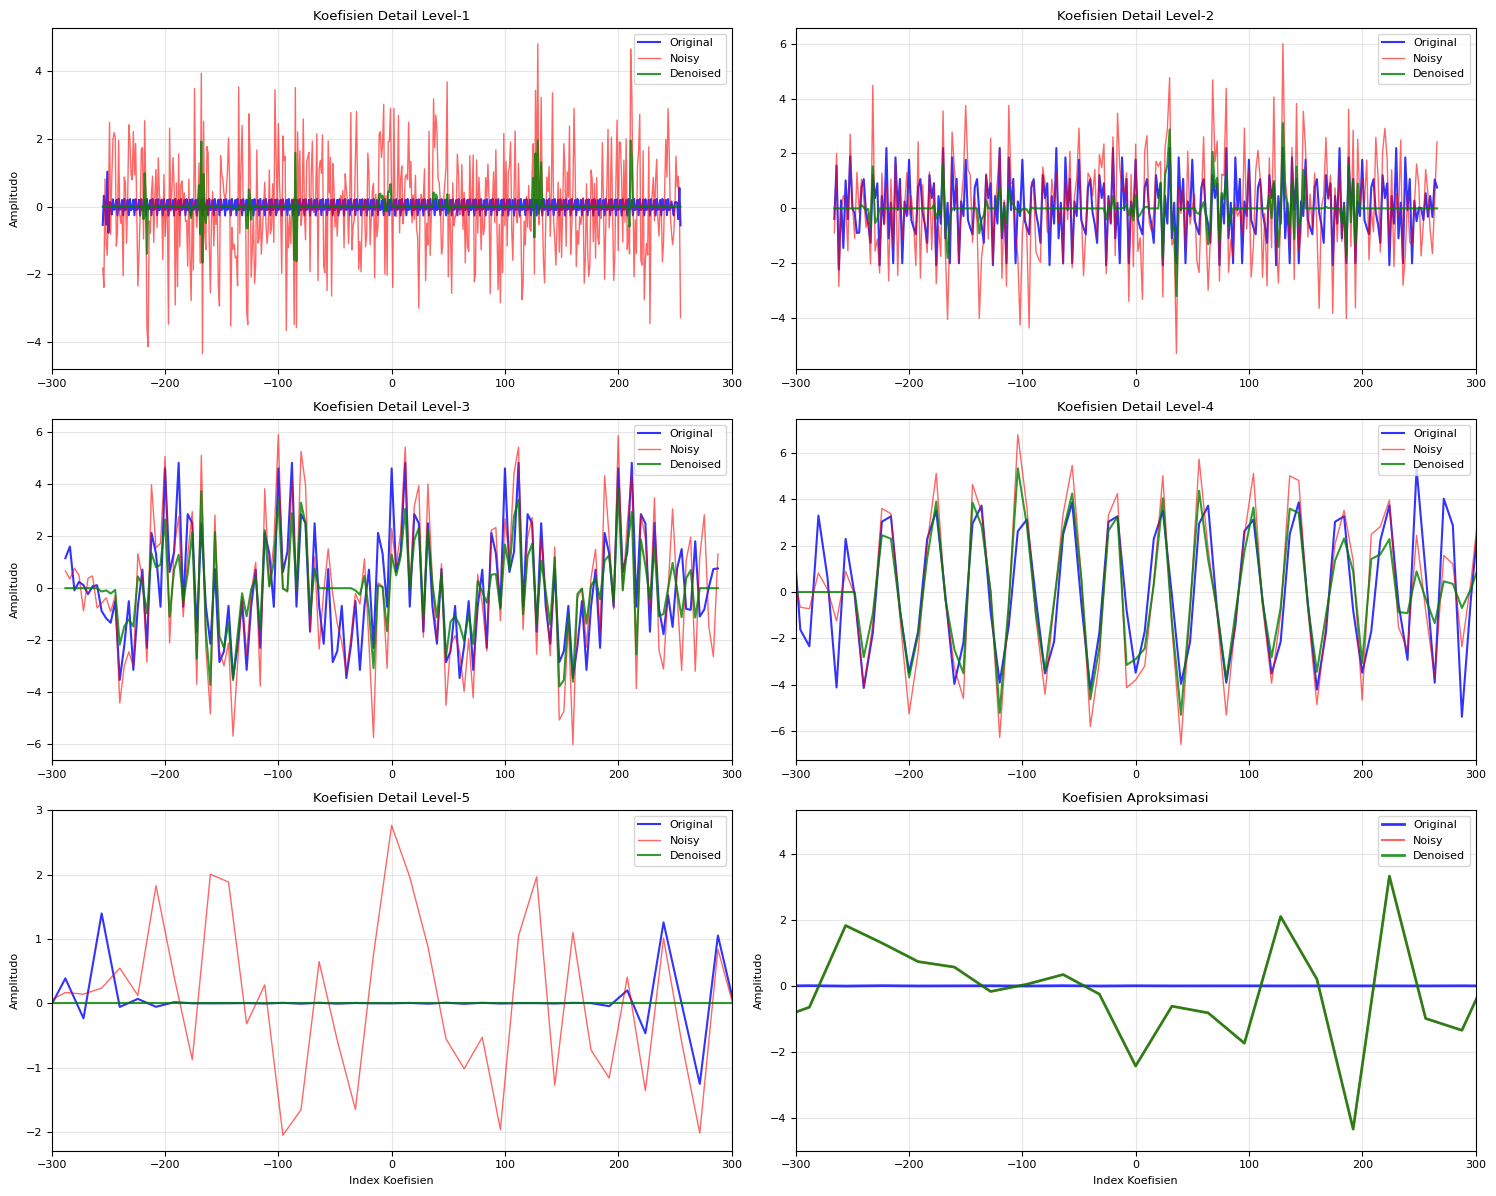

In [78]:
# Fungsi untuk memplot perbandingan koefisien wavelet dalam layout 2 kolom yang ringkas
# Setiap subplot menampilkan sinyal original, noisy, dan hasil denoising
def plot_dwt_compact_comparison(details_orig, approx_orig, details_noisy, approx_noisy, details_denoised, approx_denoised, xlim=(-300,300)):
    """
    Fungsi untuk memplot perbandingan koefisien wavelet dalam layout 2 kolom
    Setiap subplot menampilkan sinyal original, noisy, dan hasil denoising
    """
    n_levels = len(details_orig)

    # Membuat figure dengan 3 baris dan 2 kolom
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    # Judul utama (dikomentari agar tidak tampil)
    # fig.suptitle('Wavelet Coefficients Comparison: Original vs Noisy vs Denoised',
    #              fontsize=16, y=0.98)

    # Meratakan array axes untuk memudahkan indexing
    axes_flat = axes.flatten()

    # Plot koefisien detail untuk setiap level
    for i in range(n_levels):
        # Ambil koefisien detail untuk level saat ini (urutan terbalik: high to low frequency)
        d_orig = details_orig[n_levels-1-i]      # Koefisien detail sinyal asli
        d_noisy = details_noisy[n_levels-1-i]    # Koefisien detail sinyal noisy
        d_denoised = details_denoised[n_levels-1-i]  # Koefisien detail hasil denoising

        # Hitung nilai x dengan scaling yang tepat
        half = len(d_orig) // 2
        xvals = np.arange(-half, -half + len(d_orig)) * (2**i)  # Scaling domain waktu

        # Plot ketiga sinyal dalam subplot yang sama
        axes_flat[i].plot(xvals, d_orig, color='blue', linewidth=1.5, alpha=0.8, label='Original')
        axes_flat[i].plot(xvals, d_noisy, color='red', linewidth=1.0, alpha=0.6, label='Noisy')
        axes_flat[i].plot(xvals, d_denoised, color='green', linewidth=1.5, alpha=0.8, label='Denoised')
        axes_flat[i].set_xlim(xlim)  # Set batas x untuk semua plot konsisten
        axes_flat[i].grid(True, alpha=0.3)  # Grid untuk memudahkan pembacaan
        axes_flat[i].set_title(f'Koefisien Detail Level-{i+1}')  # Judul untuk setiap level
        axes_flat[i].legend(loc='upper right', fontsize=8)  # Legenda di setiap subplot

        # Tambahkan label y hanya untuk kolom kiri
        if i % 2 == 0:
            axes_flat[i].set_ylabel('Amplitudo')

    # Plot koefisien aproksimasi di subplot terakhir (posisi 5)
    half_approx = len(approx_orig) // 2
    xvals_approx = np.arange(-half_approx, -half_approx + len(approx_orig)) * (2**n_levels)

    # Plot ketiga versi koefisien aproksimasi
    axes_flat[5].plot(xvals_approx, approx_orig, color='blue', linewidth=2, alpha=0.8, label='Original')
    axes_flat[5].plot(xvals_approx, approx_noisy, color='red', linewidth=1.5, alpha=0.6, label='Noisy')
    axes_flat[5].plot(xvals_approx, approx_denoised, color='green', linewidth=2, alpha=0.8, label='Denoised')
    axes_flat[5].set_xlim(xlim)
    axes_flat[5].grid(True, alpha=0.3)
    axes_flat[5].set_title('Koefisien Aproksimasi')
    axes_flat[5].set_xlabel('Index Koefisien')
    axes_flat[5].set_ylabel('Amplitudo')
    axes_flat[5].legend(loc='upper right', fontsize=8)

    # Set label x untuk baris bawah
    for i in range(4, 6):
        axes_flat[i].set_xlabel('Index Koefisien')

    plt.tight_layout()  # Adjust layout agar tidak tumpang tindih
    return fig, axes

# Fungsi denoising dengan metode NeighBlock Thresholding
def neigh_block(details, n, sigma):
    """
    Algoritma NeighBlock untuk denoising koefisien wavelet
    Menggunakan pendekatan block-based thresholding yang adaptif
    """
    res = []
    # Hitung parameter ukuran blok
    L0 = int(np.log2(n) // 2)  # Ukuran blok utama
    L1 = max(1, L0 // 2)       # Ukuran neighborhood
    L = L0 + 2 * L1            # Total ukuran window

    # Fungsi untuk menghitung faktor shrinkage beta
    def nb_beta(sigma, L, detail):
        S2 = np.sum(detail ** 2)  # Energi sinyal dalam window
        lmbd = 4.50524  # Parameter universal threshold (solusi lmbd - log(lmbd) = 3)
        beta = (1 - lmbd * L * sigma**2 / S2)  # Rumus shrinkage factor
        return max(0, beta)  # Pastikan non-negative

    # Proses setiap level detail
    for d in details:
        d2 = d.copy()  # Salin koefisien detail
        # Loop melalui blok-blok dengan sliding window
        for start_b in range(0, len(d2), L0):
            end_b = min(len(d2), start_b + L0)  # Akhir blok
            start_B = start_b - L1              # Awal window (dengan neighborhood)
            end_B = start_B + L                 # Akhir window

            # Penanganan boundary conditions
            if start_B < 0:
                end_B -= start_B  # Adjust untuk boundary kiri
                start_B = 0
            elif end_B > len(d2):
                start_B -= end_B - len(d2)  # Adjust untuk boundary kanan
                end_B = len(d2)

            # Pastikan ukuran window konsisten
            assert end_B - start_B == L

            # Terapkan shrinkage factor pada blok saat ini
            d2[start_b:end_b] *= nb_beta(sigma, L, d2[start_B:end_B])
        res.append(d2)
    return res

# Terapkan denoising pada koefisien detail sinyal noisy
details_nb = neigh_block(details_n, len(sig_dop), 0.8)

# Untuk koefisien aproksimasi, biasanya dipertahankan dari sinyal noisy
# karena mengandung informasi frekuensi rendah yang relatif tidak terpengaruh noise
approx_denoised = approx_n  # Pertahankan koefisien aproksimasi dari sinyal noisy

# Buat plot perbandingan compact
fig, axes = plot_dwt_compact_comparison(details, approx, details_n, approx_n, details_nb, approx_denoised, xlim=(-300,300))

# Simpan gambar dengan kualitas tinggi
plt.savefig('dwt_denoising_comparison_compact.png', dpi=300, bbox_inches='tight')
plt.show()

# KETERANGAN UMUM:
# - Fungsi ini memvisualisasikan efektivitas denoising wavelet di berbagai level
# - Warna biru: sinyal asli (referensi)
# - Warna merah: sinyal noisy (sebelum denoising)
# - Warna hijau: sinyal hasil denoising (setelah NeighBlock)
# - Layout 3x2: 5 level detail + 1 aproksimasi
# - NeighBlock mengurangi noise dengan threshold adaptif berdasarkan energi lokal

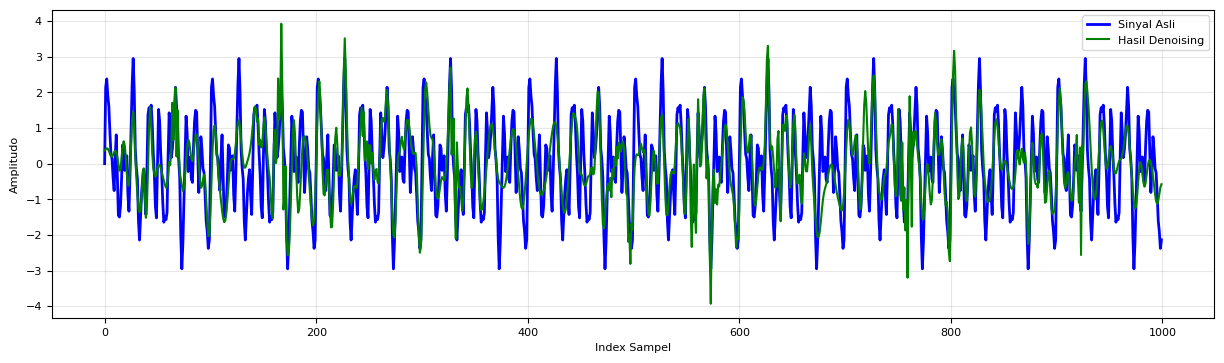

In [79]:
# Rekonstruksi sinyal dari koefisien yang sudah didenoise
# Menggabungkan koefisien aproksimasi noisy dengan koefisien detail yang sudah diproses
sig_dop_dn = pywt.waverec([approx_n] + details_nb, "sym12")

# Membuat figure untuk perbandingan sinyal asli vs hasil denoising
plt.figure(figsize=(15,4))
# plt.title("Perbandingan Sinyal Hasil Denoising dengan Sinyal Asli")
plt.plot(sig_dop, color='blue', linewidth=2)      # Plot sinyal asli (biru)
plt.plot(sig_dop_dn, color='green', linewidth=1.5) # Plot sinyal hasil denoising (hijau)
plt.legend(["Sinyal Asli", "Hasil Denoising"])
plt.xlabel("Index Sampel")
plt.ylabel("Amplitudo")
plt.grid(True, alpha=0.3)
plt.savefig('denoising_comparison.png')
plt.show()

Metrik Evaluasi

Menghitung metrik evaluasi...

PERBANDINGAN EVALUASI DENOISING: WAVELET vs FFT
METRIK               WAVELET         FFT             SELISIH         KETERANGAN          
------------------------------------------------------------------------------------------
MSE                  0.785454        0.083500        0.701954        FFT Lebih Baik      
RMSE                 0.886258        0.288964        0.597295        FFT Lebih Baik      
MAE                  0.720674        0.236821        0.483853        FFT Lebih Baik      
SNR                  2.78            12.51           -9.73           FFT Lebih Baik      
PSNR                 10.45           20.19           -9.73           FFT Lebih Baik      
ISNR                 4.64            14.37           -9.73           FFT Lebih Baik      
Correlation          0.6924          0.9753          -0.2829         FFT Lebih Baik      
NVR                  4.64            14.37           -9.73           FFT Lebih Baik      
SSIM                

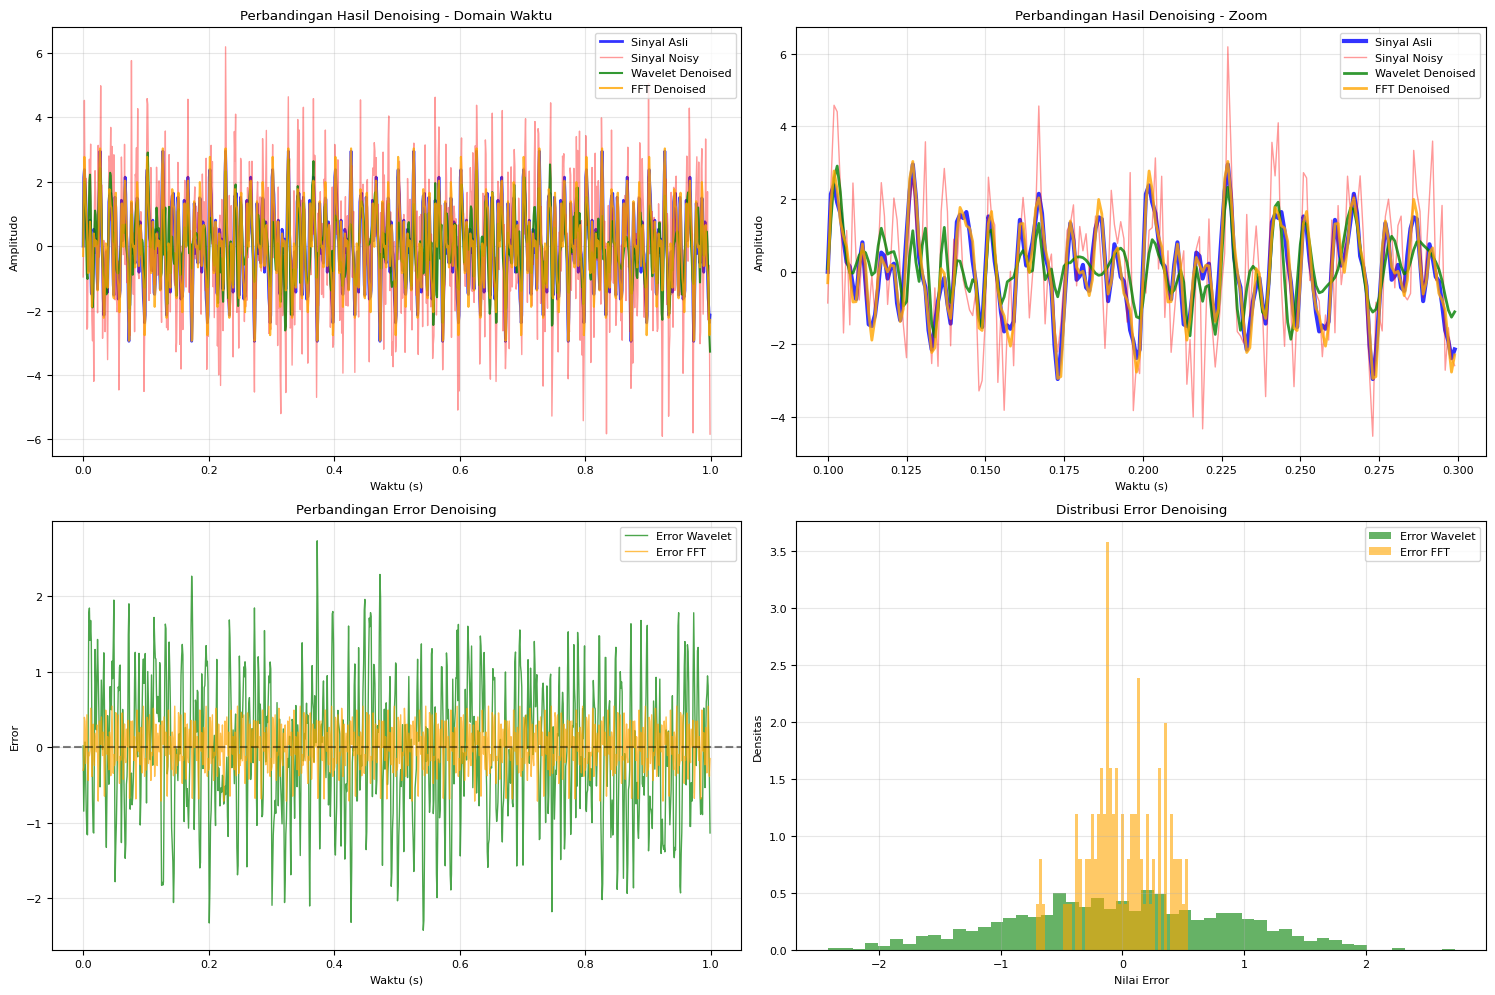


Program berhasil dijalankan! Hasil perbandingan telah disimpan dalam gambar.


In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy import signal
from sklearn.metrics import mean_squared_error, mean_absolute_error

# =============================================================================
# FUNGSI EVALUASI DENOISING
# =============================================================================

def calculate_denoising_metrics(original, noisy, denoised, method_name=""):
    """
    Menghitung berbagai metrik evaluasi performa denoising - VERSI DIPERBAIKI
    """
    # Pastikan semua sinyal memiliki panjang yang sama
    min_len = min(len(original), len(noisy), len(denoised))
    original = original[:min_len]
    noisy = noisy[:min_len]
    denoised = denoised[:min_len]

    metrics = {}

    # 1. Mean Squared Error (MSE)
    metrics['MSE'] = mean_squared_error(original, denoised)

    # 2. Root Mean Squared Error (RMSE)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])

    # 3. Mean Absolute Error (MAE)
    metrics['MAE'] = mean_absolute_error(original, denoised)

    # 4. Signal-to-Noise Ratio (SNR) dalam dB
    signal_power = np.mean(original**2)
    noise_power = np.mean((original - denoised)**2)
    metrics['SNR'] = 10 * np.log10(signal_power / noise_power) if noise_power > 0 else float('inf')

    # 5. Peak Signal-to-Noise Ratio (PSNR) dalam dB
    max_pixel = np.max(original)
    metrics['PSNR'] = 20 * np.log10(max_pixel / np.sqrt(metrics['MSE'])) if metrics['MSE'] > 0 else float('inf')

    # 6. Improvement in SNR (ISNR)
    original_snr = 10 * np.log10(np.mean(original**2) / np.mean((original - noisy)**2))
    metrics['ISNR'] = metrics['SNR'] - original_snr

    # 7. Correlation Coefficient
    metrics['Correlation'] = np.corrcoef(original, denoised)[0, 1]

    # 8. Noise Variance Reduction (NVR)
    noise_before = np.var(noisy - original)
    noise_after = np.var(denoised - original)
    metrics['NVR'] = 10 * np.log10(noise_before / noise_after) if noise_after > 0 else float('inf')

    # 9. Structural Similarity Index (SSIM) - VERSI DIPERBAIKI
    try:
        from skimage.metrics import structural_similarity as ssim
        # PERBAIKAN: Tambahkan data_range parameter
        data_range = np.max(original) - np.min(original)  # Hitung rentang data
        metrics['SSIM'] = ssim(original, denoised,
                              data_range=data_range,  # Parameter yang diperlukan
                              win_size=min(7, len(original)-1) if len(original) > 7 else 3)  # Pastikan win_size valid
    except ImportError:
        metrics['SSIM'] = None
        print("Peringatan: scikit-image tidak terinstall. SSIM tidak dapat dihitung.")
    except Exception as e:
        metrics['SSIM'] = None
        print(f"Peringatan: SSIM tidak dapat dihitung. Error: {e}")

    metrics['Method'] = method_name

    return metrics

# =============================================================================
# IMPLEMENTASI DENOISING WAVELET
# =============================================================================

# Data preparation untuk wavelet
sig_dop = f
coeffs = pywt.wavedec(sig_dop, "sym12")
approx = coeffs[0]
details = coeffs[1:]
coeffs_n = pywt.wavedec(f_t, "sym12")  # f_t adalah sinyal noisy
approx_n = coeffs_n[0]
details_n = coeffs_n[1:]

# Fungsi NeighBlock Thresholding
def neigh_block(details, n, sigma):
    res = []
    L0 = int(np.log2(n) // 2)
    L1 = max(1, L0 // 2)
    L = L0 + 2 * L1

    def nb_beta(sigma, L, detail):
        S2 = np.sum(detail ** 2)
        lmbd = 4.50524
        beta = (1 - lmbd * L * sigma**2 / S2)
        return max(0, beta)

    for d in details:
        d2 = d.copy()
        for start_b in range(0, len(d2), L0):
            end_b = min(len(d2), start_b + L0)
            start_B = start_b - L1
            end_B = start_B + L
            if start_B < 0:
                end_B -= start_B
                start_B = 0
            elif end_B > len(d2):
                start_B -= end_B - len(d2)
                end_B = len(d2)
            assert end_B - start_B == L
            d2[start_b:end_b] *= nb_beta(sigma, L, d2[start_B:end_B])
        res.append(d2)
    return res

# Terapkan denoising wavelet
details_nb = neigh_block(details_n, len(sig_dop), 0.8)
approx_denoised = approx_n
sig_dop_dn = pywt.waverec([approx_n] + details_nb, "sym12")

# Pastikan panjang sama
sig_dop_dn = sig_dop_dn[:len(f)]

# =============================================================================
# IMPLEMENTASI DENOISING FFT
# =============================================================================

# Menghitung Fast Fourier Transform (FFT)
n = len(t)
fhat = np.fft.fft(f_t, n)
PSD = fhat * np.conj(fhat) / n
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1, np.floor(n/2), dtype='int')

THRESHOLD = 50

# Dapatkan nilai-nilai (k) yang lebih tinggi daripada THRESHOLD
indices = PSD > THRESHOLD

# Buat yang lain nol
PSD_clean = PSD * indices
fhat_clean = fhat * indices

# inverse FFT
filtered_signal = np.fft.ifft(fhat_clean)
filtered_signal_real = np.real(filtered_signal)

# =============================================================================
# EVALUASI DAN PERBANDINGAN - DENGAN PERBAIKAN ERROR HANDLING
# =============================================================================

print("Menghitung metrik evaluasi...")

try:
    # Hitung metrik untuk kedua metode
    metrics_wavelet = calculate_denoising_metrics(f, f_t, sig_dop_dn, "Wavelet NeighBlock")
    metrics_fft = calculate_denoising_metrics(f, f_t, filtered_signal_real, "FFT Thresholding")

    # Tampilkan tabel perbandingan
    print("\n" + "=" * 90)
    print("PERBANDINGAN EVALUASI DENOISING: WAVELET vs FFT")
    print("=" * 90)
    print(f"{'METRIK':<20} {'WAVELET':<15} {'FFT':<15} {'SELISIH':<15} {'KETERANGAN':<20}")
    print("-" * 90)

    # Daftar metrik untuk ditampilkan
    metric_names = ['MSE', 'RMSE', 'MAE', 'SNR', 'PSNR', 'ISNR', 'Correlation', 'NVR']

    for metric_name in metric_names:
        wavelet_val = metrics_wavelet.get(metric_name, 'N/A')
        fft_val = metrics_fft.get(metric_name, 'N/A')

        if wavelet_val != 'N/A' and fft_val != 'N/A' and not np.isinf(wavelet_val) and not np.isinf(fft_val):
            if metric_name in ['MSE', 'RMSE', 'MAE']:
                wavelet_fmt = f"{wavelet_val:.6f}"
                fft_fmt = f"{fft_val:.6f}"
                difference = wavelet_val - fft_val
                difference_fmt = f"{difference:.6f}"
                if difference < 0:
                    remark = "Wavelet Lebih Baik"
                else:
                    remark = "FFT Lebih Baik"
            elif metric_name in ['Correlation']:
                wavelet_fmt = f"{wavelet_val:.4f}"
                fft_fmt = f"{fft_val:.4f}"
                difference = wavelet_val - fft_val
                difference_fmt = f"{difference:.4f}"
                if difference > 0:
                    remark = "Wavelet Lebih Baik"
                else:
                    remark = "FFT Lebih Baik"
            else:  # SNR, PSNR, ISNR, NVR
                wavelet_fmt = f"{wavelet_val:.2f}"
                fft_fmt = f"{fft_val:.2f}"
                difference = wavelet_val - fft_val
                difference_fmt = f"{difference:.2f}"
                if difference > 0:
                    remark = "Wavelet Lebih Baik"
                else:
                    remark = "FFT Lebih Baik"
        else:
            wavelet_fmt = 'N/A'
            fft_fmt = 'N/A'
            difference_fmt = 'N/A'
            remark = 'N/A'

        print(f"{metric_name:<20} {wavelet_fmt:<15} {fft_fmt:<15} {difference_fmt:<15} {remark:<20}")

    # SSIM jika tersedia
    if metrics_wavelet.get('SSIM') is not None and metrics_fft.get('SSIM') is not None:
        wavelet_ssim = metrics_wavelet.get('SSIM', 'N/A')
        fft_ssim = metrics_fft.get('SSIM', 'N/A')
        if wavelet_ssim != 'N/A' and fft_ssim != 'N/A':
            wavelet_ssim_fmt = f"{wavelet_ssim:.4f}"
            fft_ssim_fmt = f"{fft_ssim:.4f}"
            difference_ssim = wavelet_ssim - fft_ssim
            difference_ssim_fmt = f"{difference_ssim:.4f}"
            if difference_ssim > 0:
                remark_ssim = "Wavelet Lebih Baik"
            else:
                remark_ssim = "FFT Lebih Baik"
            print(f"{'SSIM':<20} {wavelet_ssim_fmt:<15} {fft_ssim_fmt:<15} {difference_ssim_fmt:<15} {remark_ssim:<20}")

    print("-" * 90)

except Exception as e:
    print(f"Error dalam menghitung metrik: {e}")
    print("Melanjutkan dengan visualisasi tanpa metrik...")

# =============================================================================
# VISUALISASI PERBANDINGAN (TANPA METRIK JIKA ADA ERROR)
# =============================================================================

# Plot perbandingan hasil denoising
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Domain waktu - overview
axes[0, 0].plot(t, f, 'b-', linewidth=2, label='Sinyal Asli', alpha=0.8)
axes[0, 0].plot(t, f_t, 'r-', linewidth=1, label='Sinyal Noisy', alpha=0.4)
axes[0, 0].plot(t, sig_dop_dn, 'g-', linewidth=1.5, label='Wavelet Denoised', alpha=0.8)
axes[0, 0].plot(t, filtered_signal_real, 'orange', linewidth=1.5, label='FFT Denoised', alpha=0.8)
axes[0, 0].set_xlabel('Waktu (s)')
axes[0, 0].set_ylabel('Amplitudo')
axes[0, 0].set_title('Perbandingan Hasil Denoising - Domain Waktu')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Domain waktu - zoom
zoom_start = 100
zoom_end = 300
axes[0, 1].plot(t[zoom_start:zoom_end], f[zoom_start:zoom_end], 'b-', linewidth=3, label='Sinyal Asli', alpha=0.8)
axes[0, 1].plot(t[zoom_start:zoom_end], f_t[zoom_start:zoom_end], 'r-', linewidth=1, label='Sinyal Noisy', alpha=0.4)
axes[0, 1].plot(t[zoom_start:zoom_end], sig_dop_dn[zoom_start:zoom_end], 'g-', linewidth=2, label='Wavelet Denoised', alpha=0.8)
axes[0, 1].plot(t[zoom_start:zoom_end], filtered_signal_real[zoom_start:zoom_end], 'orange', linewidth=2, label='FFT Denoised', alpha=0.8)
axes[0, 1].set_xlabel('Waktu (s)')
axes[0, 1].set_ylabel('Amplitudo')
axes[0, 1].set_title('Perbandingan Hasil Denoising - Zoom')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Error comparison
error_wavelet = sig_dop_dn - f
error_fft = filtered_signal_real - f
axes[1, 0].plot(t, error_wavelet, 'g-', linewidth=1, label='Error Wavelet', alpha=0.7)
axes[1, 0].plot(t, error_fft, 'orange', linewidth=1, label='Error FFT', alpha=0.7)
axes[1, 0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[1, 0].set_xlabel('Waktu (s)')
axes[1, 0].set_ylabel('Error')
axes[1, 0].set_title('Perbandingan Error Denoising')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Histogram error
axes[1, 1].hist(error_wavelet, bins=50, alpha=0.6, color='green', label='Error Wavelet', density=True)
axes[1, 1].hist(error_fft, bins=50, alpha=0.6, color='orange', label='Error FFT', density=True)
axes[1, 1].set_xlabel('Nilai Error')
axes[1, 1].set_ylabel('Densitas')
axes[1, 1].set_title('Distribusi Error Denoising')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('perbandingan_denoising_wavelet_vs_fft.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nProgram berhasil dijalankan! Hasil perbandingan telah disimpan dalam gambar.")

Dengan cara lain